# MLR Log Transformation of Response

In [20]:
#Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from math import sqrt

In [ ]:
#Regular MLR, log transformation of features, and square root transformation of features all violated the homoscedasticity and
#normality of errors assumption. I've only included the log transformation of response MLR model to avoid redundant output.

In [12]:
#Reading in cleaned data
df = pd.read_excel('Car_details_v3_cleaned.xlsx',index_col=0)

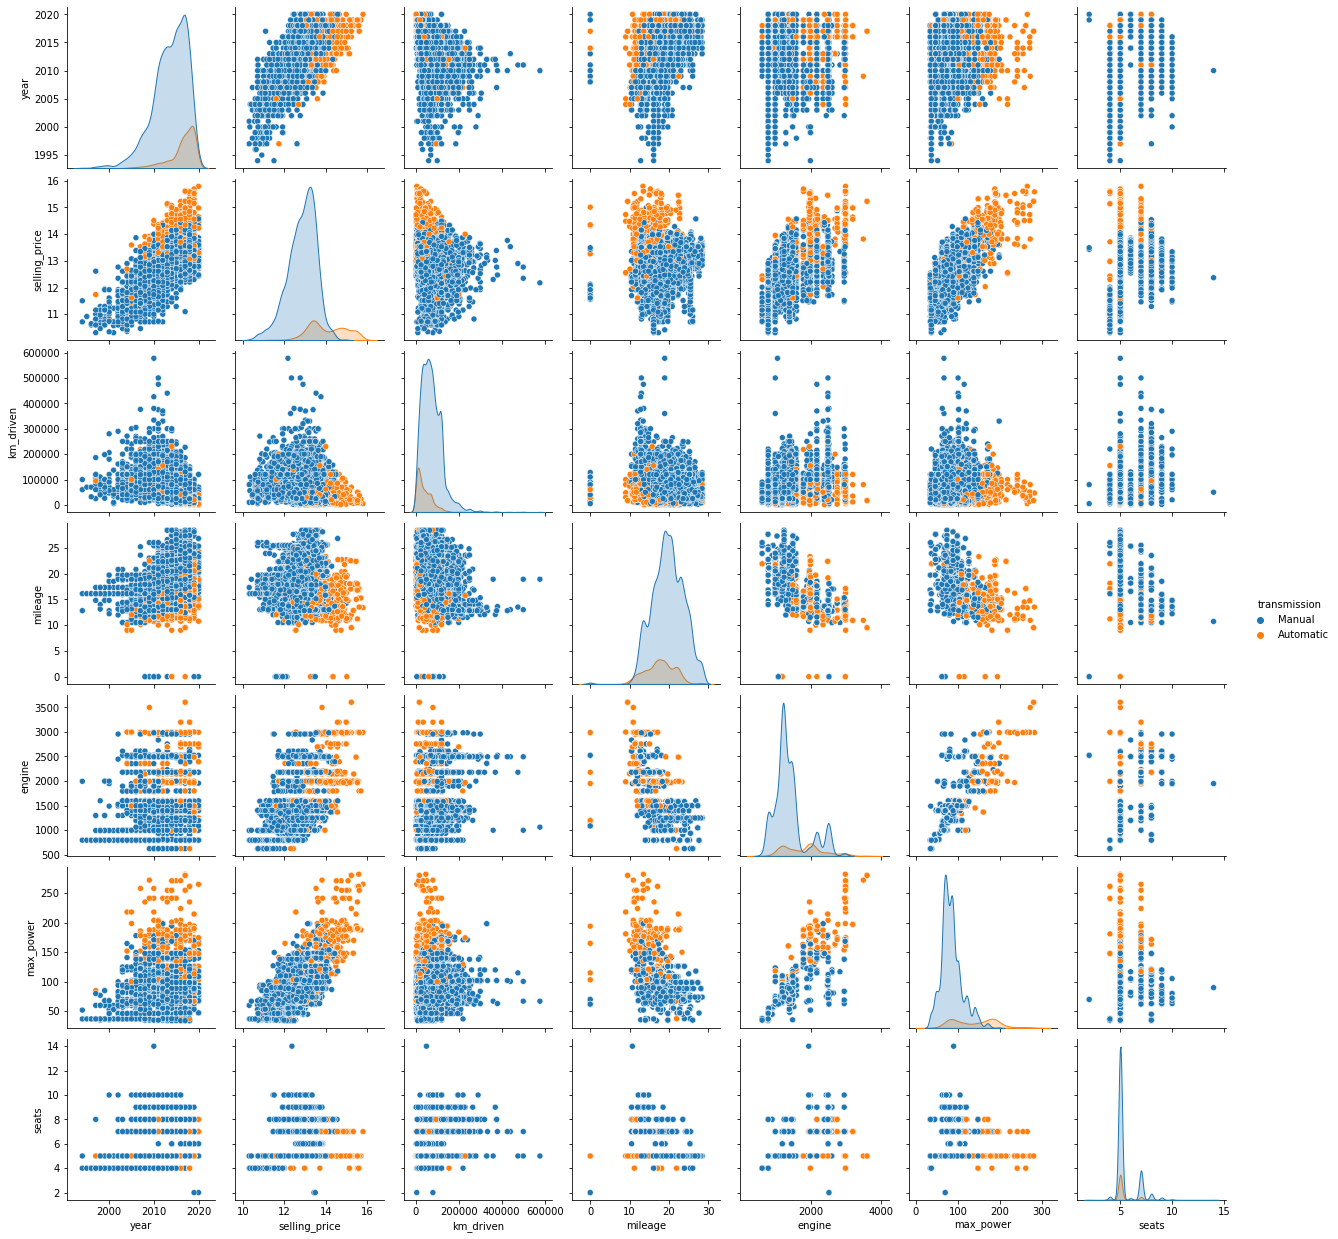

In [14]:
#Pairplot Linearity test (after log transforming selling_price)
df2 = df.copy()
df2['selling_price'] = np.log(df['selling_price'])
sns.pairplot(df2,hue='transmission') #transmission as category
plt.show()

In [15]:
#Splitting data into training and test data
X = df.drop('selling_price',axis=1)
y = df['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [16]:
#Concatenating train features and response
train_feat = pd.DataFrame(X_train)
train_resp = pd.DataFrame(y_train)
train_df = pd.concat([train_feat.reset_index(),train_resp.reset_index()],axis=1)

In [17]:
mlr_4 = sm.ols(formula='np.log(selling_price) ~ year + mileage + seats + km_driven + engine + max_power + C(transmission)', data=train_df).fit()

In [18]:
print(mlr_4.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(selling_price)   R-squared:                       0.864
Model:                               OLS   Adj. R-squared:                  0.864
Method:                    Least Squares   F-statistic:                     5313.
Date:                   Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                           14:07:16   Log-Likelihood:                -1384.2
No. Observations:                   5862   AIC:                             2784.
Df Residuals:                       5854   BIC:                             2838.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [21]:
#Root Mean Square Error
y_pred_train = mlr_4.predict(X_train)
y_pred_test = mlr_4.predict(X_test)
print('RMSE for train data: {}'.format(sqrt(mean_squared_error(y_train,y_pred_train))))
print('RMSE for test data: {}'.format(sqrt(mean_squared_error(y_test,y_pred_test))))

RMSE for train data: 1047343.7623010585
RMSE for test data: 1019859.3802243382


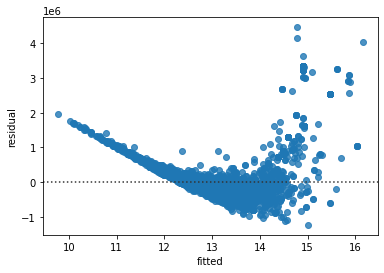

In [22]:
#Homoscedasticity (rejected)
plt.figure()
train_pred = mlr_4.fittedvalues.copy()
true_val = train_df['selling_price'].values.copy()
resid = true_val - train_pred
sns.residplot(x=train_pred,y=resid)
plt.xlabel('fitted')
plt.ylabel('residual')
plt.show()

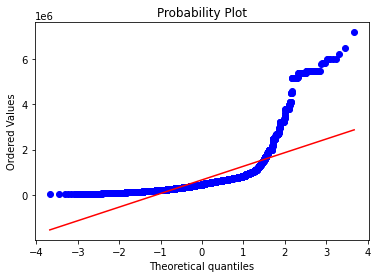

In [23]:
#Normality of errors/residuals (rejected)
plt.figure()
stats.probplot(resid,dist='norm',plot=plt)
plt.show()